

# Import and Data mining


In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import re
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Dropout, Conv1D, Flatten, Dense, Embedding
from keras.preprocessing import sequence
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer 
#from keras_preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences
from tensorflow.keras.utils import pad_sequences
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import os
from datetime import timedelta
import datetime


In [ ]:
import random 
np.random.seed(10)
tf.random.set_seed(10)

In [ ]:
# API KEY
api='11095e93d9944c44f0b3131bb50264fc'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# From this API we collect the earning call data
try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen
import certifi
import json
url = ("https://financialmodelingprep.com/api/v3/sp500_constituent?apikey=11095e93d9944c44f0b3131bb50264fc")
response = urlopen(url, cafile=certifi.where())
data = response.read().decode("utf-8")

#API from here 

<ipython-input-8-0ce35c529311>:10: DeprecationWarning: cafile, capath and cadefault are deprecated, use a custom context instead.
  response = urlopen(url, cafile=certifi.where())


In [ ]:
# Creating year list for our data set - we want all the earnings call between 2010-2022
years = []
year = 2010
for i in range(13):
  years.append(year+i) 

In [ ]:
# Creating dataframe of all the S&P 500 companies
sp500 = pd.DataFrame()
comps =requests.get(f"https://financialmodelingprep.com/api/v3/sp500_constituent?apikey=11095e93d9944c44f0b3131bb50264fc").json()
sp500 = sp500.append(comps)

In [ ]:
sp500

,symbol,name,sector,subSector,headQuarter,dateFirstAdded,cik,founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,0000066740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,0000091142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,0000001800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,0001551152,2013
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,0001467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,0001041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,0000877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,0001136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,0000109380,1873


In [ ]:
# Save the data 
sp500.to_csv(os.path.join('/content/drive/MyDrive/Final Project/Data Collecting', 'sp500data'))

In [ ]:
# Creating list of the symbols of the companies
symbols =[]
for i in range(len(sp500['symbol'])):
  symbols.append(sp500['symbol'][i])

In [ ]:
#creating list of years 
years_for_price = []
year = 2008
#get the data
for i in range(15):
  years_for_price.append(year+i)
df = pd.DataFrame()
#save the data
df =get_price(years_for_price,symbols,df)
df.to_csv(os.path.join('/content/drive/MyDrive/Final Project/Data Collecting', 'price'))

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Symbol
Date,,,,,,,,
2008-01-02,84.239998,84.760002,82.230003,82.709999,53.143661,4453700,2008,MMM
2008-01-03,82.820000,83.480003,82.370003,82.699997,53.137222,2724100,2008,MMM
2008-01-04,82.000000,82.660004,81.550003,81.760002,52.533260,3620300,2008,MMM
2008-01-07,82.099998,82.150002,80.769997,81.110001,52.115601,4223800,2008,MMM
2008-01-08,81.349998,82.070000,80.099998,80.209999,51.537327,5711200,2008,MMM
...,...,...,...,...,...,...,...,...
2022-12-23,144.509995,145.889999,143.539993,145.759995,145.418304,1017900,2022,ZTS
2022-12-27,145.910004,146.149994,143.570007,145.300003,144.959396,957900,2022,ZTS
2022-12-28,145.179993,146.639999,143.770004,143.830002,143.492844,1443900,2022,ZTS


In [ ]:
# In this function we collect the sp500 index price between the year 2010 - 2022

def get_sp500_prices(start_date, end_date):
    sp500 = yf.Ticker('^GSPC')
    prices = sp500.history(start=start_date, end=end_date)['Close']
    prices = pd.DataFrame(prices)
    prices.reset_index(inplace=True)
    prices.columns = ['date', 'price'] 
    return prices

sp500 = get_sp500_prices('2010-01-01', '2022-01-01')
sp500.to_csv(os.path.join('/content/drive/MyDrive/Final Project/Data Collecting', 'sp500'))

In [ ]:
# This Function get for each company her transcipt of there earning call on the year and symbol we provide
# The Function take the data from an API and in the end create a dataframe with all the data 
# In addition in this function we creating  merge between the df with the transcript to the df with the sp500 price data
# The Key of the merge is the earning call date 

def get_by_year(years, symbols):
    df = pd.DataFrame()
    for year in years:
        for symbol in symbols:
            url = f"https://financialmodelingprep.com/api/v4/batch_earning_call_transcript/{symbol}?year={year}&apikey=11095e93d9944c44f0b3131bb50264fc"
            response = requests.get(url)
            if response.status_code == 200:
                transcript = response.json()
                df = df.append(transcript)
            else:
                print(f"Failed to download data for {symbol} in {year}")
   
    return df


In [ ]:
df1 = get_by_year(years,symbols)

In [ ]:
#save the data
df1.to_csv(os.path.join('/content/drive/MyDrive/Final Project/Data Collecting', 'by_year'))

In [ ]:
# this function will provide us the historical stock price of the sp500 firms
def get_stock_yield(symbolsList):

    df_his_stock_price = []

    for symbol in symbolsList:
      df_his_stock_price = pd.DataFrame()
      stock_price =requests.get(f"https://financialmodelingprep.com/api/v3/historical-price-full/{s}?from=2009-01-01&to=2022-12-31&apikey=11095e93d9944c44f0b3131bb50264fc").json()
      
      if stock_price == {}: # if in the symbol doesn't exist in the API
        continue
      df_his_stock_price = df_his_stock_price.append(stock_price['historical']) # historical provide us a list of dictioneris which contaion all the stock price between 2009-2022

      

    return df_his_stock_price

In [ ]:
df_his_stock_price = get_stock_yield(symbols)

In [ ]:
df_his_stock_price.to_csv('/content/drive/MyDrive/Final Project/Data Collecting/df_his_stock_price')

The files below are files we collceting from the internet and we use them in our final data

In [ ]:
by_year = '/content/drive/MyDrive/Final Project/Data Collecting/by_year' # file which contain the transcripts
sp500 = '/content/drive/MyDrive/Final Project/Data Collecting/sp 500 project.csv' # file which contain the companies in the sp500 index right to 2022
df_his_stock_price = '/content/drive/MyDrive/Final Project/Data Collecting/df_his_stock_price' # file which contain the historical stock prices of the s&p 500 companies between the years 2009-2022


# Read CSV file into a DataFrame
data = pd.read_csv(by_year)
sp500 = pd.read_csv(sp500)
df_his_stock_price = pd.read_csv(df_his_stock_price)


More pre processs:
in this part we contiue with the pre processing, doing some data manipultaion for creating the final dataframe which we use in the end.


In [ ]:
# convert datetime to date
data['Date'] = pd.to_datetime(data['date']).dt.date
sp500['Date'] = pd.to_datetime(sp500['Date'], format='%d/%m/%Y')
sp500['Date'] = sp500['Date'].dt.strftime('%Y-%m-%d')

#sp500['Date'] = pd.to_datetime(sp500['date'], format='%Y-%m-%d', errors='coerce').dt.date

# output the result
print(data['Date'].dtype)
print(sp500['Date'].dtype)

object
object
object


In [ ]:
symbols = data['symbol'].unique().tolist()
print(len(symbols))

495


In [ ]:
df_his_stock_price

,Unnamed: 0,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,symbol
0,0,2022-12-30,119.65,120.03,118.51,119.92,118.352959,2096006,2094900,0.27,0.225660,119.53,"December 30, 22",0.002257,MMM
1,1,2022-12-29,118.87,120.86,118.50,120.57,118.994469,2060929,2060800,1.70,1.430000,120.24,"December 29, 22",0.014300,MMM
2,2,2022-12-28,120.35,121.00,118.25,118.29,116.744263,1961048,1961000,-2.06,-1.710000,118.97,"December 28, 22",-0.017100,MMM
3,3,2022-12-27,120.14,120.83,119.16,120.22,118.649040,1811184,1811200,0.08,0.066589,120.20,"December 27, 22",0.000666,MMM
4,4,2022-12-23,120.79,121.00,117.80,120.14,118.570084,2609395,2609300,-0.65,-0.538120,119.64,"December 23, 22",-0.005381,MMM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669994,1669994,2009-01-08,34.66,34.66,30.45,31.10,7.705672,359598,3765464,-3.56,-10.270000,31.76,"January 08, 09",-0.102700,WBD
1669995,1669995,2009-01-07,34.68,36.60,33.30,33.94,7.439959,420180,2390280,-0.74,-2.130000,34.16,"January 07, 09",-0.021300,WBD
1669996,1669996,2009-01-06,30.37,34.89,29.82,34.62,7.659683,360018,3476610,4.25,13.990000,32.70,"January 06, 09",0.139900,WBD
1669997,1669997,2009-01-05,27.54,30.98,27.54,29.32,7.562596,195926,3985235,1.78,6.460000,29.73,"January 05, 09",0.064600,WBD


In [ ]:
df_his_stock_price = df_his_stock_price.rename(columns={'date': 'Date'})

In [ ]:
df_his_stock_price = df_his_stock_price.rename(columns={'close': 'Close'})

In [ ]:
df_his_stock_price['Date'] = df_his_stock_price['Date'].astype(data['Date'].dtype)

In [ ]:
import datetime
from datetime import datetime, timedelta

In [ ]:
df_his_stock_price['Date'] = pd.to_datetime(df_his_stock_price['Date'], format='%Y-%m-%d')

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
df_his_stock_price['Date'] = pd.to_datetime(df_his_stock_price['Date'], format='%Y-%m-%d')
sp500['Date'] = pd.to_datetime(sp500['Date'], format='%Y-%m-%d')


After the data is ready, we create 2 funcions to create the labels. The first one calculate the yeilds with the day before the earning calls existed and the second one the day after. We comapre the stock yield to SP500 yield and create the label. 
label = {1,   Company yield-sp500 yield>3% 
         2,   Company yield-sp500 yield<3%
         0,   otherwise }                                                    
We will calculate the yield of the share by the function below:
<br><br>
$\frac{Share price Day Before-Share price (Year/Quarter) Before}{Shareprice (Year/Quarter) Before}*100$

In [ ]:
# In this function we find the date before of the companies earning call dates and take the closing price -
# of the company stock and the s&p closing price.
# there are some problematic dates which the day before those date there wasn't trading so we - 
# took the day before by loop until we find the first date that was a trading before the earning call.

# for q1,q2,q3 we will calculate the yield by the period of quarter before 
# for q4 we will  calculate the yield by the period of year before

from datetime import datetime, timedelta
def calculate_yield1(symbols,price,data,years,sp500):
  final_data = data.copy()
  for s in symbols:
        print(s, symbols.index(s), "of" , len(symbols))
        temp_df = data.loc[data['symbol'] == s]
        temp_price = price.loc[price['symbol'] == s] 
        temp_price_copy = temp_price.copy()
        temp_price_copy['Date'] = pd.to_datetime(temp_price_copy['Date']) # convert to datetime
        for year in years:
          print(year)
          y = str(year)
          if not (temp_price_copy['Date'].dt.year == int(y)).any():
            print('No data on', year, 'of symbol' , s)
            continue
          for i in range (1,5):
            try:
              if i ==1:
                main_date = pd.to_datetime(temp_df[(temp_df['year'] == year) & (temp_df['quarter']== i)]['Date'].values[0])
                date_before = main_date -timedelta(days=1)
                # q before 
                if year == 2010:
                  curr_q = pd.to_datetime(temp_df[(temp_df['year'] == year) & (temp_df['quarter']== 4)]['Date'].values[0])
                  q4_day_before = curr_q - timedelta(days=366)
                else:
                  curr_q = pd.to_datetime(temp_df[(temp_df['year'] == year-1) & (temp_df['quarter']== 4)]['Date'].values[0])
                  q4_day_before = curr_q - timedelta(days=1)

                #get the price of day before
                price_start = temp_price[temp_price['Date'] == q4_day_before]['Close'].values
                price_end = temp_price[temp_price['Date'] == date_before]['Close'].values

                # in case there is no value, take the day before until there is
                n = 0 
                while price_start.size == 0 and n<30:
                  q4_day_before = q4_day_before - timedelta(days=1)
                  price_start = temp_price[temp_price['Date'] == q4_day_before]['Close'].values
                  n = n+1

                price_start = price_start[0]
                n=0
                while price_end.size == 0 and n<30:
                  date_before = date_before - timedelta(days=1)
                  price_end = temp_price[temp_price['Date'] == date_before]['Close'].values
                  n= n+1
                
                price_end = price_end[0]

                #create laybel 
                yield_ = ((price_end/price_start -1 )*100)
                p_sp500_start= sp500[sp500['Date'] == q4_day_before ]['Close'].values[0]

                p_sp500_end = sp500[sp500['Date'] ==date_before  ]['Close'].values[0]

                p_sp500 = ((p_sp500_end/p_sp500_start -1 )*100)

                if p_sp500+3 < yield_ :
                  laybel = 1 
                elif p_sp500-3 > yield_ :
                  laybel = 2
                else: 
                  laybel = 0 

                #insert the laybel 
                final_data.loc[(final_data['symbol'] == s) & (final_data['Date'] == main_date ),'p_sp500_start'] = p_sp500_start
                final_data.loc[(final_data['symbol'] == s) & (final_data['Date'] == main_date ),'p_sp500_end'] = p_sp500_end
                final_data.loc[(final_data['symbol'] == s) & (final_data['Date'] == main_date ),'p_sp500'] = p_sp500
                final_data.loc[(final_data['symbol'] == s) & (final_data['Date'] == main_date ),'price_start'] = price_start
                final_data.loc[(final_data['symbol'] == s) & (final_data['Date'] == main_date ),'price_end'] = price_end
                final_data.loc[(final_data['symbol'] == s) & (final_data['Date'] == main_date ),'yield'] = yield_
                final_data.loc[(final_data['symbol'] == s) & (final_data['Date'] == main_date ),'label'] = laybel 

              elif i == 4 :
                main_date =  pd.to_datetime(temp_df[(temp_df['year'] == year) & (temp_df['quarter']== i)]['Date'].values[0])
                date_before = main_date - timedelta(days=1)
                # year before 
                year_before =  pd.to_datetime(temp_df[(temp_df['year'] == year-1) & (temp_df['quarter']== 4)]['Date'].values[0])
                q4_day_before = year_before - timedelta(days=1)

                #get the price of day before
                price_start = temp_price[temp_price['Date'] == q4_day_before]['Close'].values
                price_end = temp_price[temp_price['Date'] == date_before]['Close'].values

                # in case there is no value, take the day before until there is 
                n =0 
                while price_start.size == 0 and n< 30:
                  q4_day_before = q4_day_before - timedelta(days=1)
                  price_start = temp_price[temp_price['Date'] == q4_day_before]['Close'].values
                  n= n+1
                price_start = price_start[0]
                
                n = 0 
                while price_end.size == 0 and n<30:
                  date_before = date_before - timedelta(days=1)
                  price_end = temp_price[temp_price['Date'] == date_before]['Close'].values
                  n = n+1
                price_end = price_end[0]

                #create laybel 
                yield_ = ((price_end/price_start -1 )*100)
                p_sp500_start= sp500[sp500['Date'] == q4_day_before ]['Close'].values[0]
                p_sp500_end = sp500[sp500['Date'] == date_before ]['Close'].values[0]

                p_sp500 = ((p_sp500_end/p_sp500_start -1 )*100)

                if p_sp500+3 < yield_ :
                  laybel = 1 
                elif p_sp500-3 > yield_ :
                  laybel = 2
                else: 
                  laybel = 0 
                  
                #insert the laybel 
                final_data.loc[(final_data['symbol'] == s) & (final_data['Date'] == main_date ),'p_sp500_start'] = p_sp500_start
                final_data.loc[(final_data['symbol'] == s) & (final_data['Date'] == main_date ),'p_sp500_end'] = p_sp500_end
                final_data.loc[(final_data['symbol'] == s) & (final_data['Date'] == main_date ),'p_sp500'] = p_sp500
                final_data.loc[(final_data['symbol'] == s) & (final_data['Date'] == main_date ),'price_start'] = price_start
                final_data.loc[(final_data['symbol'] == s) & (final_data['Date'] == main_date ),'price_end'] = price_end
                final_data.loc[(final_data['symbol'] == s) & (final_data['Date'] == main_date ),'yield'] = yield_
                final_data.loc[(final_data['symbol'] == s) & (final_data['Date'] == main_date ),'label'] = laybel 

              else:
                main_date =  pd.to_datetime(temp_df[(temp_df['year'] == year) & (temp_df['quarter']== i)]['Date'].values[0])
                date_before = main_date - timedelta(days=1)
                # q before 
                q_before =  pd.to_datetime(temp_df[(temp_df['year'] == year) & (temp_df['quarter']== i-1)]['Date'].values[0])
                q_day_before = q_before - timedelta(days=1)

                #get the price of day before
                price_start = temp_price[temp_price['Date'] == q_day_before]['Close'].values
                price_end = temp_price[temp_price['Date'] == date_before]['Close'].values
                # in case there is no value, take the day before until there is 
                n =0 
                while price_start.size == 0 and n<30:
                  q_day_before = q_day_before - timedelta(days=1)
                  price_start = temp_price[temp_price['Date'] == q_day_before]['Close'].values
                  n = n+1
                price_start = price_start[0]

                n= 0 
                while price_end.size == 0 and n<30:
                  date_before = date_before - timedelta(days=1)
                  price_end = temp_price[temp_price['Date'] == date_before]['Close'].values
                  n = n+1
                price_end = price_end[0]

                #create laybel 
                yield_ = ((price_end/price_start -1 )*100)
                p_sp500_start= sp500[sp500['Date'] == q_day_before ]['Close'].values[0]
                #print("p_sp500_start" , p_sp500_start)
                p_sp500_end = sp500[sp500['Date'] == date_before ]['Close'].values[0]
                #print("p_sp500_end" , p_sp500_end)
                p_sp500 = ((p_sp500_end/p_sp500_start -1 )*100)
                #print("p_sp500" , p_sp500)

                if p_sp500+3 < yield_ :
                  laybel = 1 
                elif p_sp500-3 > yield_ :
                  laybel = 2
                else: 
                  laybel = 0 
                  
                #insert the laybel 
                final_data.loc[(final_data['symbol'] == s) & (final_data['Date'] == main_date ),'p_sp500_start'] = p_sp500_start
                final_data.loc[(final_data['symbol'] == s) & (final_data['Date'] == main_date ),'p_sp500_end'] = p_sp500_end
                final_data.loc[(final_data['symbol'] == s) & (final_data['Date'] == main_date ),'p_sp500'] = p_sp500
                final_data.loc[(final_data['symbol'] == s) & (final_data['Date'] == main_date ),'price_start'] = price_start
                final_data.loc[(final_data['symbol'] == s) & (final_data['Date'] == main_date ),'price_end'] = price_end
                final_data.loc[(final_data['symbol'] == s) & (final_data['Date'] == main_date ),'yield'] = yield_
                final_data.loc[(final_data['symbol'] == s) & (final_data['Date'] == main_date ),'label'] = laybel 
            except:
              print('can not add yield to', s , 'on year', year , 'on q', i )
  return final_data


In [ ]:
# In this function we the the same we did above but here we calculte the day after the prior earning call
from datetime import datetime, timedelta
def calculate_yield2(symbols,price,data,years,sp500):
  final_data = data.copy()
  for s in symbols:
        print(s, symbols.index(s), "of" , len(symbols))
        temp_df = data.loc[data['symbol'] == s]
        temp_price = price.loc[price['symbol'] == s] 
        temp_price_copy = temp_price.copy()
        temp_price_copy['Date'] = pd.to_datetime(temp_price_copy['Date']) # convert to datetime
        for year in years:
          print(year)
          y = str(year)
          if not (temp_price_copy['Date'].dt.year == int(y)).any():
            print('No data on', year, 'of symbol' , s)
            continue
          for i in range (1,5):
            try:
              if i ==1:
                main_date = pd.to_datetime(temp_df[(temp_df['year'] == year) & (temp_df['quarter']== i)]['Date'].values[0])
                date_after = main_date + timedelta(days=1)
                # q before 
                if year == 2010:
                  curr_q = pd.to_datetime(temp_df[(temp_df['year'] == year) & (temp_df['quarter']== 4)]['Date'].values[0])
                  q4_day_after = curr_q + timedelta(days=366)
                else:
                  curr_q = pd.to_datetime(temp_df[(temp_df['year'] == year-1) & (temp_df['quarter']== 4)]['Date'].values[0])
                  q4_day_after = curr_q + timedelta(days=1)

                #get the price of day before
                price_start = temp_price[temp_price['Date'] == q4_day_after]['Close'].values
                price_end = temp_price[temp_price['Date'] == date_after]['Close'].values

                # in case there is no value, take the day before until there is
                n = 0 
                while price_start.size == 0 and n<30:
                  q4_day_after = q4_day_after + timedelta(days=1)
                  price_start = temp_price[temp_price['Date'] == q4_day_after]['Close'].values
                  n = n+1

                price_start = price_start[0]
                n=0
                while price_end.size == 0 and n<30:
                  date_after = date_after + timedelta(days=1)
                  price_end = temp_price[temp_price['Date'] == date_after]['Close'].values
                  n= n+1
                
                price_end = price_end[0]

                #create laybel 
                yield_ = ((price_end/price_start -1 )*100)
                p_sp500_start= sp500[sp500['Date'] == q4_day_after ]['Close'].values[0]

                p_sp500_end = sp500[sp500['Date'] ==date_after  ]['Close'].values[0]

                p_sp500 = ((p_sp500_end/p_sp500_start -1 )*100)

                if p_sp500+3 < yield_ :
                  laybel = 1 
                elif p_sp500-3 > yield_ :
                  laybel = 2
                else: 
                  laybel = 0 

                #insert the laybel 
                final_data.loc[(final_data['symbol'] == s) & (final_data['Date'] == main_date ),'p_sp500'] = p_sp500
                final_data.loc[(final_data['symbol'] == s) & (final_data['Date'] == main_date ),'yield'] = yield_
                final_data.loc[(final_data['symbol'] == s) & (final_data['Date'] == main_date ),'label'] = laybel 

              elif i == 4 :
                main_date =  pd.to_datetime(temp_df[(temp_df['year'] == year) & (temp_df['quarter']== i)]['Date'].values[0])
                date_after = main_date + timedelta(days=1)
                # year before 
                if year ==2010:
                  year_before =  pd.to_datetime(temp_df[(temp_df['year'] == year) & (temp_df['quarter']== 4)]['Date'].values[0])
                  q4_day_after = year_before - timedelta(days=364)
                else:
                  year_before =  pd.to_datetime(temp_df[(temp_df['year'] == year-1) & (temp_df['quarter']== 4)]['Date'].values[0])
                  q4_day_after = year_before + timedelta(days=1)

                #get the price of day before
                price_start = temp_price[temp_price['Date'] == q4_day_after]['Close'].values
                price_end = temp_price[temp_price['Date'] == date_after]['Close'].values

                # in case there is no value, take the day before until there is 
                n =0 
                while price_start.size == 0 and n< 30:
                  q4_day_after = q4_day_after + timedelta(days=1)
                  price_start = temp_price[temp_price['Date'] == q4_day_after]['Close'].values
                  n= n+1
                price_start = price_start[0]
                
                n = 0 
                while price_end.size == 0 and n<30:
                  date_after = date_after + timedelta(days=1)
                  price_end = temp_price[temp_price['Date'] == date_after]['Close'].values
                  n = n+1
                price_end = price_end[0]

                #create laybel 
                yield_ = ((price_end/price_start -1 )*100)
                p_sp500_start= sp500[sp500['Date'] == q4_day_after ]['Close'].values[0]
                p_sp500_end = sp500[sp500['Date'] == date_after ]['Close'].values[0]

                p_sp500 = ((p_sp500_end/p_sp500_start -1 )*100)

                if p_sp500+3 < yield_ :
                  laybel = 1 
                elif p_sp500-3 > yield_ :
                  laybel = 2
                else: 
                  laybel = 0 
                  
                #insert the laybel 
                final_data.loc[(final_data['symbol'] == s) & (final_data['Date'] == main_date ),'p_sp500'] = p_sp500
                final_data.loc[(final_data['symbol'] == s) & (final_data['Date'] == main_date ),'yield'] = yield_
                final_data.loc[(final_data['symbol'] == s) & (final_data['Date'] == main_date ),'label'] = laybel 

              else:
                main_date =  pd.to_datetime(temp_df[(temp_df['year'] == year) & (temp_df['quarter']== i)]['Date'].values[0])
                date_after = main_date + timedelta(days=1)
                # q before 
                q_before =  pd.to_datetime(temp_df[(temp_df['year'] == year) & (temp_df['quarter']== i-1)]['Date'].values[0])
                q_day_after = q_before + timedelta(days=1)

                #get the price of day before
                price_start = temp_price[temp_price['Date'] == q_day_after]['Close'].values
                price_end = temp_price[temp_price['Date'] == date_after]['Close'].values
                # in case there is no value, take the day before until there is 
                n =0 
                while price_start.size == 0 and n<30:
                  q_day_after = q_day_after + timedelta(days=1)
                  price_start = temp_price[temp_price['Date'] == q_day_after]['Close'].values
                  n = n+1
                price_start = price_start[0]

                n= 0 
                while price_end.size == 0 and n<30:
                  date_after = date_after + timedelta(days=1)
                  price_end = temp_price[temp_price['Date'] == date_after]['Close'].values
                  n = n+1
                price_end = price_end[0]

                #create laybel 
                yield_ = ((price_end/price_start -1 )*100)
                p_sp500_start= sp500[sp500['Date'] == q_day_after ]['Close'].values[0]
                p_sp500_end = sp500[sp500['Date'] == date_after ]['Close'].values[0]
                p_sp500 = ((p_sp500_end/p_sp500_start -1 )*100)

                if p_sp500+3 < yield_ :
                  laybel = 1 
                elif p_sp500-3 > yield_ :
                  laybel = 2
                else: 
                  laybel = 0 
                  
                #insert the laybel 
                final_data.loc[(final_data['symbol'] == s) & (final_data['Date'] == main_date ),'p_sp500'] = p_sp500
                final_data.loc[(final_data['symbol'] == s) & (final_data['Date'] == main_date ),'yield'] = yield_
                final_data.loc[(final_data['symbol'] == s) & (final_data['Date'] == main_date ),'label'] = laybel 
            except:
              print('can not add yield to', s , 'on year', year , 'on q', i )
  return final_data


In [ ]:
data_final = calculate_yield1(symbols,df_his_stock_price,data,years,sp500)

In [ ]:
data_final = calculate_yield2(symbols,df_his_stock_price,data,years,sp500)

In [ ]:
# ths is our final data frame
# label represent 2 is mean that the yield of the company was 3 precent less the the yield of the s&p500
# label represent 1 is mean that the yield of the company was 3 precent more the the yield of the s&p500
# label represent 0 is mean that the yield of the company was nor 3 precent less and nor 3 precent more the the yield of the s&p500


data_final

,Unnamed: 0,symbol,quarter,year,date,content,Date,p_sp500,yield,label
0,0,MMM,4,2010,2011-01-25 17:00:00,"Operator: Ladies and gentlemen, thank you for ...",2011-01-25,18.720525,9.726816,2.0
1,1,MMM,3,2010,2010-10-28 17:00:00,"Operator: Ladies and gentlemen, thank you for ...",2010-10-28,7.309594,-2.262969,2.0
2,2,MMM,2,2010,2010-07-22 17:00:00,"Operator: Ladies and gentlemen, thank you for ...",2010-07-22,-8.627918,-3.537445,1.0
3,3,MMM,1,2010,2010-04-28 17:00:00,"Operator: [ABRUPT START] As a reminder, this c...",2010-04-28,-8.468407,1.998173,1.0
4,0,ABT,4,2010,2011-01-27 17:00:00,"Operator: Good morning, and thank you for stan...",2011-01-27,17.685996,-15.681222,2.0
...,...,...,...,...,...,...,...,...,...,...
22524,3,ZION,1,2022,2022-04-25 22:39:06,Operator: Greetings. Welcome to the Zions Banc...,2022-04-25,-4.160497,-16.019856,2.0
22525,0,ZTS,4,2022,2023-02-14 12:51:08,Operator: Welcome to the Fourth Quarter and Fu...,2023-02-14,NaN,NaN,NaN
22526,1,ZTS,3,2022,2022-11-03 11:17:09,Operator: Welcome to the Third Quarter 2022 Fi...,2022-11-03,-9.037943,-23.446538,2.0
22527,2,ZTS,2,2022,2022-08-04 13:25:02,Operator: Welcome to the Second Quarter 2022 F...,2022-08-04,0.529912,3.191301,0.0


In [ ]:
#save the data with the labels

data_final.to_csv(os.path.join('/content/drive/MyDrive/FinalProject/Final data', 'final_data'))


In [ ]:
final_data = '/content/drive/MyDrive/Final Project/Final data/final_data'
final_data = pd.read_csv(final_data)

In [ ]:
final_data= final_data.dropna(axis= 0)
final_data

,Unnamed: 0,Unnamed: 0.1,symbol,quarter,year,date,content,Date,p_sp500_start,p_sp500_end,p_sp500,price_start,price_end,yield,laybel
1,1,1,MMM,3,2010,2010-10-28 17:00:00,"Operator: Ladies and gentlemen, thank you for ...",2010-10-28,1069.589966,1182.449951,10.551706,82.3000,90.3700,9.805589,0.0
2,2,2,MMM,2,2010,2010-07-22 17:00:00,"Operator: Ladies and gentlemen, thank you for ...",2010-07-22,1183.709961,1069.589966,-9.640875,87.9700,82.3000,-6.445379,1.0
3,3,3,MMM,1,2010,2010-04-28 17:00:00,"Operator: [ABRUPT START] As a reminder, this c...",2010-04-28,1091.760010,1183.709961,8.422176,81.4800,87.9700,7.965145,0.0
5,5,1,ABT,1,2010,2010-04-21 17:00:00,Operator: Good morning and thank you for stand...,2010-04-21,1092.170044,1207.170044,10.529496,26.1394,25.4581,-2.606410,2.0
6,6,0,ACN,3,2010,2010-06-25 17:00:00,"Operator: Ladies and gentlemen, thank you for ...",2010-06-25,1165.729980,1073.689941,-7.895485,41.5200,37.5500,-9.561657,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22523,22523,2,ZION,2,2022,2022-07-26 20:34:03,"Operator: Greetings, welcome to the Zions Banc...",2022-07-26,4271.779785,3966.840088,-7.138469,60.7400,54.0900,-10.948304,2.0
22524,22524,3,ZION,1,2022,2022-04-25 22:39:06,Operator: Greetings. Welcome to the Zions Banc...,2022-04-25,4397.939941,4271.779785,-2.868619,61.7500,60.7400,-1.635628,0.0
22526,22526,1,ZTS,3,2022,2022-11-03 11:17:09,Operator: Welcome to the Third Quarter 2022 Fi...,2022-11-03,4155.169922,3759.689900,-9.517782,180.1600,147.3600,-18.206039,2.0
22527,22527,2,ZTS,2,2022,2022-08-04 13:25:02,Operator: Welcome to the Second Quarter 2022 F...,2022-08-04,4300.169922,4155.169922,-3.371960,176.8600,180.1600,1.865883,1.0


In [ ]:
final_data = final_data.drop(['Unnamed: 0', 'Unnamed: 0.1'],axis = 1)

In [ ]:
final_data.rename(columns = {'laybel':'label'}, inplace = True)

In [ ]:
final_data.head()

,symbol,quarter,year,date,content,Date,p_sp500_start,p_sp500_end,p_sp500,price_start,price_end,yield,label
1,MMM,3,2010,2010-10-28 17:00:00,"Operator: Ladies and gentlemen, thank you for ...",2010-10-28,1069.589966,1182.449951,10.551706,82.3000,90.3700,9.805589,0.0
2,MMM,2,2010,2010-07-22 17:00:00,"Operator: Ladies and gentlemen, thank you for ...",2010-07-22,1183.709961,1069.589966,-9.640875,87.9700,82.3000,-6.445379,1.0
3,MMM,1,2010,2010-04-28 17:00:00,"Operator: [ABRUPT START] As a reminder, this c...",2010-04-28,1091.760010,1183.709961,8.422176,81.4800,87.9700,7.965145,0.0
5,ABT,1,2010,2010-04-21 17:00:00,Operator: Good morning and thank you for stand...,2010-04-21,1092.170044,1207.170044,10.529496,26.1394,25.4581,-2.606410,2.0
6,ACN,3,2010,2010-06-25 17:00:00,"Operator: Ladies and gentlemen, thank you for ...",2010-06-25,1165.729980,1073.689941,-7.895485,41.5200,37.5500,-9.561657,0.0


In [ ]:
final_data.shape

(21139, 13)

As we can *see* the final shape is (21139,13) thats mean we have 21139 transcripts

# Visualization

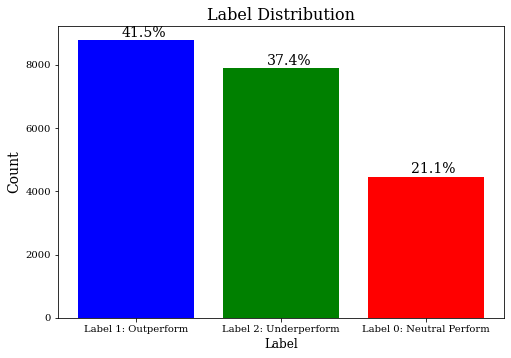

In [ ]:
# Label Distribution
label_map = {0: 'Label 0: Neutral Perform', 1: 'Label 1:Outperform', 2: 'Label 2: Underperform'}
df = final_data. copy()
# Replace labels in DataFrame
df['label'] = df['label'].replace(label_map)

# Count occurrences of each label
label_counts = df['label'].value_counts()

# Create bar plot
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(['Label 1: Outperform', 'Label 2: Underperform','Label 0: Neutral Perform',], label_counts, color=['blue', 'green', 'red'])
total = len(df)
for i, v in enumerate(label_counts):
    perc = v / total * 100
    ax.text(i - 0.1, v + total * 0.005, f'{v/total:.1%}', fontdict={'fontsize': 14})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 10
plt.subplots_adjust(top=0.8)
ax.set_title('Label Distribution', fontsize=16)
ax.set_xlabel('Label', fontsize=12)
ax.set_ylabel('Count', fontsize=14)
plt.show()







We can see most of the companies are belong to the group of the outperform and the underperform

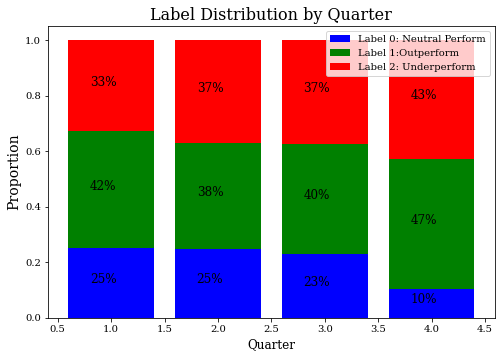

In [ ]:


# Define a mapping of labels

# Replace labels in DataFrame
df['label'] = df['label'].replace(label_map)

# Count occurrences of each label by quarter
label_counts = df.groupby(['quarter', 'label']).size().reset_index(name='count')

# Pivot table to make each label a column
label_counts_pivot = label_counts.pivot(index='quarter', columns='label', values='count').fillna(0)

# Calculate percentages for each label by quarter
label_perc = label_counts_pivot.apply(lambda x: x / x.sum(), axis=1)

# Create bar plot
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(label_counts_pivot.index, label_perc['Label 0: Neutral Perform'], color='blue', label='Label 0: Neutral Perform')
ax.bar(label_counts_pivot.index, label_perc['Label 1:Outperform'], bottom=label_perc['Label 0: Neutral Perform'], color='green', label='Label 1:Outperform')
ax.bar(label_counts_pivot.index, label_perc['Label 2: Underperform'], bottom=label_perc['Label 0: Neutral Perform'] + label_perc['Label 1:Outperform'], color='red', label='Label 2: Underperform')

# Add percentages on top of bars
for i, row in label_perc.iterrows():
    ax.text(i - 0.2, row['Label 0: Neutral Perform'] / 2, f'{row["Label 0: Neutral Perform"]:.0%}', fontsize=12)
    ax.text(i - 0.2, row['Label 0: Neutral Perform'] + row['Label 1:Outperform'] / 2, f'{row["Label 1:Outperform"]:.0%}', fontsize=12)
    ax.text(i - 0.2, row['Label 0: Neutral Perform'] + row['Label 1:Outperform'] + row['Label 2: Underperform'] / 2, f'{row["Label 2: Underperform"]:.0%}', fontsize=12)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 10
plt.subplots_adjust(top=0.8)
ax.set_title('Label Distribution by Quarter', fontsize=16)
ax.set_xlabel('Quarter', fontsize=12)
ax.set_ylabel('Proportion', fontsize=14)
ax.legend()
plt.show()





We can see for quarter 1,2,3 the label distibute like their proporation but in Q4 the  neutural perform is in very low proporation, maybe thaths because we calculate the yield of this quarter yearly

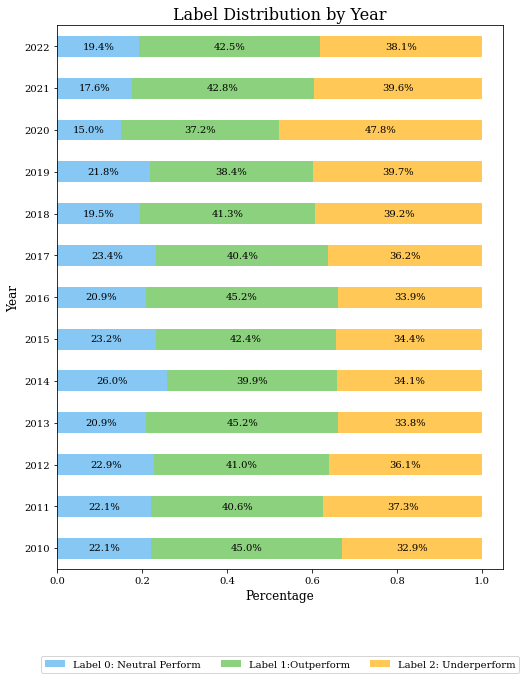

In [ ]:
label_counts_year = df.groupby(['year', 'label'])['label'].count().unstack().fillna(0)

# Calculate percentage of each label by year
label_perc_year = label_counts_year.apply(lambda x: x / x.sum(), axis=1)

# Create horizontal bar plot
fig, ax = plt.subplots(figsize=(8, 10))
label_perc_year.plot(kind='barh', stacked=True, ax=ax, color=['#86C7F3', '#8CD17D', '#FFC857'])
plt.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.2))
ax.set_title('Label Distribution by Year', fontsize=16)
ax.set_xlabel('Percentage', fontsize=12)
ax.set_ylabel('Year', fontsize=12)

# Add percentage labels to bars
for i, row in enumerate(label_perc_year.values):
    xpos = 0
    for j, perc in enumerate(row):
        if perc > 0:
            label = f'{perc*100:.1f}%'
            ax.text(xpos + perc/2, i, label, ha='center', va='center', fontsize=10)
        xpos += perc

plt.show()

We can see in 2020 most of the companies were underperforms thats make sense because it was the year of the corona.

In [ ]:
# Pre Processing

At this part we will do two sperate pre processing.
The first one we will use it in The FinBert model, we will save the structure of the transcripts, thats mean we will not remove special charcters like '/n' & ' . '

At the second part we will do pre processing like we learn at the tuition - stemming, remove stopword and brackets and we use the processces data in other 'regular' models.

* Part 1:  pre process for the FinBert Model 

In [ ]:
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\:]', '', text)

# Removing the noisy text
def clean_text(text):
    text = remove_between_square_brackets(text)
    return text
final_data['content'] =final_data['content'].apply(clean_text)

In [ ]:
# we will remove the special charcaters besides "/n" and " . "

def remove_special_characters(text):
    pattern = r'[^\w\s\n.]'
    text = re.sub(pattern,'',text)
    return text
final_data['content'] =final_data['content'].apply(remove_special_characters)

In [ ]:
# example for a transcript
final_data['content'][1]

'Operator Ladies and gentlemen thank you for standing by. Welcome to the 3M Third Quarter Earnings Conference Call. Operator Instructions I would now like to turn the call over to Matt Ginter Vice President of Investor Relations at 3M.\nMatt Ginter Good morning everyone and welcome to our third quarter earnings call. Before we begin just a quick reminder. On the morning of Tuesday December 7 well host our annual outlook meeting at the Grand Hyatt Hotel in New York City. Those of you that are on our email distribution list shouldve received an invitation earlier this week. Please RSVP as soon as you can and for those of you who are not on our list who would wish to go just drop a note or call and well take care of you. Take a moment if you would to read the forwardlooking statement on Slide 2. During todays conference call well make certain predictive statements that reflect our current views about our future performance and financial results. We base these statements on certain assumpt

In [ ]:
# Lets do some statistics 
transcript_list =  list(final_data['content'])
# Divide each transcript to paragraph by the "\n" charchter
paragraph_list = [transcript_list[i].split('\n') for i in range(0,len(transcript_list))]


In [ ]:
def text_statistcs(layer1,layer2):
  longest_text,shortest_text,shortest_para,longest_para = 0,0,0,0
  count_len_para,count_para = 0,0
  para_under_512,para_under_100,para_under_90,para_under_80,para_under_70,para_under_60 = 0,0,0,0,0,0  
  idx, idx1 , index, index1 = 0,0,0,0
  for text in layer1:
    if len(text) > longest_text:
      longest_text = len(text)
    if len(text) < longest_text:
      shortest_text = len(text)

  for company in layer2:
    for para in company:
      count_len_para = count_len_para +len(para)
      count_para = count_para + 1
      if len(para) > longest_para:
        longest_para = len(para)
        idx1 = idx
        index1 = index
      if len(para) < shortest_para:
        shortest_para = len(para)  
      if len(para) < 512:
        para_under_512 = para_under_512 +1
      if len(para) < 100:
        para_under_100 = para_under_100 +1
        if len(para) < 90:
            para_under_90 = para_under_90 +1
        if len(para) < 80:
            para_under_80 = para_under_80 +1
        if len(para) < 70:
            para_under_70 = para_under_70 +1
        if len(para) < 60:
          para_under_60 = para_under_60 +1
        idx = idx + 1
    idx = 0
    index = index + 1
  lst = [para_under_100 ,para_under_90 , para_under_80 ,para_under_70 ,para_under_60 ]
  n = [100,90,80,70,60]
  for item1, item2 in zip(n, lst):
    print(f'Total Paragraphs under length of {item1}: {item2}')  
  avg_para = count_len_para / count_para




  print('The length of the longest text: ',longest_text )
  print('The length of the shortest text: ',shortest_text )

  print('The length of the longest paragraph: ',longest_para )
  print('The length of the shortest paragraph: ',shortest_para )
  print('Total paragraphs: ',count_para)
  print('The length of the average paragraph:',avg_para)
  print('The num of paragraph under len of 512:',para_under_512)
  print('Total length of the all transcripts',count_len_para)


In [ ]:
text_statistcs(transcript_list,paragraph_list)

Total Paragraphs under length of 100: 542974
Total Paragraphs under length of 90: 491556
Total Paragraphs under length of 80: 427748
Total Paragraphs under length of 70: 364013
Total Paragraphs under length of 60: 310143
The length of the longest text:  205010
The length of the shortest text:  52182
The length of the longest paragraph:  59182
The length of the shortest paragraph:  0
Total paragraphs:  1781728
The length of the average paragraph: 604.3425955027928
The num of paragraph under len of 512: 1254999
Total lengtt of th all trscripts 1076774124


* We can see the nearly 30% of the pargraphs are under 100 charchters and 15% of them under 100.
* We can see that the average length of paragraph is 604, BERT model can process text in maximum length of 604, we need to handle with this issue.

* we can see that 70% of the paragraphs under the length of 512.
* We can see our data complex from 1,781,728 paragarphs and 1,076,774,124 charchters!

In [ ]:
# Lets examine random first paragraph
paragraph_list[6465][0]

'Operator Good morning and welcome to the MGM Resorts International Third Quarter 2014 Earnings Conference Call. Joining the call from the company today are Jim Murren Chairman and Chief Executive Officer Dan DArrigo Executive Vice President Chief Financial Officer and Treasurer Grant Bowie Chief Executive Officer of MGM China Holdings Limited. Operator Instructions Please note this event is being recorded. Now I would like to turn the call over to Ms. Sarah Rogers.'

As We can see this paragraph is made up of technical sentences and regular phrasing, let's examine another one

In [ ]:
paragraph_list[10005][0]

'Operator My name is Heidi and I will be your conference operator today. At this time I would like to welcome everyone to the Mohawk Industries Third Quarter 2016 Earnings Conference Call. All lines have been placed on mute to prevent any background noise. After the speakers remarks there will be a questionandanswers period. Operator Instructions As a reminder ladies and gentlemen this conference is being recorded today Friday November 4 2016. Thank you. I would now like to introduce Mr. Frank Boykin. Mr. Boykin you may begin your conference.'

We can see here the same

In [ ]:
# Let's examine the second paragraph
paragraph_list[999][1]

'Angela K. Freeman Thank you. On our call today will be John Wiehoff CEO and Chad Lindbloom CFO. John and Chad will provide some prepared comments on the highlights of our fourth quarter and fullyear performance and we will follow that with a questionandanswer session. Operator Instructions Please note that there are presentation slides that accompany our call to facilitate our discussion today. The slides can be accessed in the Investor Relations section of the website which is located at chrobinson.com. John and Chad will be referring to the slides in their prepared comments. Finally I would like to remind you that comments made by John Chad or others representing C.H. Robinson may contain forwardlooking statements which are subject to risk and uncertainties. Our SEC filings contain additional information about factors that could cause actual results to differ from managements expectations. And with that Ill turn it over to John.'

We can see the same is happen with the second one


In [ ]:
# Let's examine the third paragraph
paragraph_list[13228][2]

'Richard C. Adkerson Good morning everyone. As well be talking about as I do review these highlights its been a very active quarter for us here at FCX. Results from our global mining operations have been solid our teams continue to execute our plans in a very effective way. In Indonesia we had an important milestone in progressing our efforts to reach stabilization of our business there in terms of our negotiations with the government with the signing of definitive divestment agreements on September 27. Operations current operations in Papua have been strong and weve made important progress in transitioning the Grasberg ore body mining from open pit to underground so well talk about that. We are continuing our sharp focus on the important things about our business to build shareholder value. Our unit net costs are at 0.93 a pound significantly below last year and in line with our plans it does reflect for the nine months 0.02 as a result of the successful settlement of our labor situat

We can see that in the third paragraph there is more relevent information.
Hence, we decide to remove the first to paragraph of each transcripts, in this way we can reduce the data.

In addition we will build more function based on the statistics here to reduce the number of the paragraph so we will can handle with more information in the FinBert model.

In [ ]:
# This function remove the first X paragraphs of each transcripts
def remove_x_para_in_the_beging(lst,x):
  new_lst = lst.copy()
  new_lst = [new_lst[i][x:] for i in range(0,len(new_lst))]
  return new_lst

In [ ]:
# This function unite paragraphs which have length less than X
# As we saw earlyer there are a lot of paragraph that their length are less then X >>
# >> those paragraph don't have a lot of information on them because ther are short so we decide to>> 
# >>unite them we the pargraph come next to them until the combination of them reach the length X.

def concate_para_less_then_x(lst,x):
  comp_lst = []
  lst_copy = lst.copy()
  for comp in lst_copy:
    concate_para = []
    for i in range(0,len(comp)):
      if len(comp[i]) < x and i < len(comp) - 1:
        comp[i+1] = comp[i] + '. ' + comp[i+1]
      else:
          concate_para.append(comp[i])
    comp_lst.append(concate_para)
  return comp_lst

In [ ]:
# This function sperate paragrphs into parts until each parts are less the max len.
# we do this because the Bert embadding can't contain more than 510 charechters
def seperate_para_less_then_mal_len(lst,max_len):
  comp_lst = []

  for comp in lst:
    concate_para = []
    for i in range(0,len(comp)):
      if len(comp[i]) > max_len:
        len1 = len(comp[i])
        start = 0 
        end = max_len
        while(len1 > max_len):
          temp = comp[i][start:end]
  
          concate_para.append(temp)
          start = end
          end = end + max_len
          len1 = len1 - max_len
        if len(comp[i][start:]) > 0:
            concate_para.append(comp[i][start:])
            
      else:
          concate_para.append(comp[i])
    comp_lst.append(concate_para)
  return comp_lst

In [ ]:
# This function we will use to delete paragrphs that have length of 0
def delete_para_less_then_val(val,data):
  copy = data.copy()
  matrix = []
  for comp in copy:
    lst = []
    for para in comp:
      if len(para) > val:
        lst.append(para)
    matrix.append(lst)
  return matrix

In [ ]:
# Here we will remove the first 2 paragraphs of each transcript
paragraph_list = remove_x_para_in_the_beging(paragraph_list,2)

# Here we will concate paragraphs which their length less than 100
paragraph_list = concate_para_less_then_x(paragraph_list,100)

# Here we will divide paragraphs which their length more than 450 >>
# We chose 450 and not 510 because of compute power, we tried with diffrent length and that was the >>
# that our model succeed to handle with
paragraph_list = seperate_para_less_then_mal_len(paragraph_list,450)

# Here we will delete paragraphs which have length of 0
paragraph_list = delete_para_less_then_val(1,paragraph_list)


In [ ]:
# Now Let's show the statistics again
text_statistcs(transcript_list,paragraph_list)

Total Paragraphs under length of 100: 193526
Total Paragraphs under length of 90: 174721
Total Paragraphs under length of 80: 155778
Total Paragraphs under length of 70: 136073
Total Paragraphs under length of 60: 117312
The length of the longest text:  205010
The length of the shortest text:  52182
The length of the longest paragraph:  450
The length of the shortest paragraph:  0
Total paragraphs:  2945030
The length of the average paragraph: 346.47717850072837
The num of paragraph under len of 512: 2945030
Total lengtt of th all trscripts 1020385685


* We can see we reduce the length of the average paragraphs to 346 so the Bert model would be able to handle with this.
* We can see we still have paragraph that are shorter then 100 that's because of the fucntion that divide paragraph which are less than 450 length so we will repet the function which concate paragraph are less than length of 450.
* We can see the longest paragraph is 450 long.
* We can see that the function which unite paragraphs that less than 100 help us to reduce the number of those paragaph in total but because we use after that with the function which divide the paragraph with length more than 450
it's create more small paragraph, so we will keep with this.

Now we will continue to reducing the data using diffrent methods

In [ ]:
# This is financial corpus which contain words from financail documnets for furter information:
# https://sraf.nd.edu/loughranmcdonald-master-dictionary/
financial_corpus  = pd.read_csv('/content/drive/MyDrive/Final Project/Data Preprocessing/Part 1/Loughran-McDonald_MasterDictionary.csv')

In [ ]:
financial_corpus.head()

,Word,Seq_num,Word Count,Word Proportion,Average Proportion,Std Dev,Doc Count,Negative,Positive,Uncertainty,Litigious,Strong_Modal,Weak_Modal,Constraining,Syllables,Source
0,AARDVARK,1,354,1.550080e-08,1.422600e-08,3.815486e-06,99,0,0,0,0,0,0,0,2,12of12inf
1,AARDVARKS,2,3,1.313627e-10,8.653817e-12,9.241714e-09,1,0,0,0,0,0,0,0,2,12of12inf
2,ABACI,3,9,3.940882e-10,1.169679e-10,5.290465e-08,7,0,0,0,0,0,0,0,3,12of12inf
3,ABACK,4,29,1.269840e-09,6.654735e-10,1.595100e-07,28,0,0,0,0,0,0,0,2,12of12inf
4,ABACUS,5,8570,3.752595e-07,3.809464e-07,3.529356e-05,1108,0,0,0,0,0,0,0,3,12of12inf


In [ ]:
financial_corpus.shape

(86531, 16)

We can see this corpus contain 86,531 words and 15 feature about them.
One of the feature are word count which contain the number of the time this word apper in the all financail documents, later we will use this feature to reducing the data.

In [ ]:
financial_corpus.describe()

,Seq_num,Word Count,Word Proportion,Average Proportion,Std Dev,Doc Count,Negative,Positive,Uncertainty,Litigious,Strong_Modal,Weak_Modal,Constraining,Syllables
count,86531.000000,8.653100e+04,8.653100e+04,8.653100e+04,8.653100e+04,8.653100e+04,86531.000000,86531.000000,86531.000000,86531.000000,86531.000000,86531.000000,86531.000000,86531.000000
mean,43267.739007,2.639231e+05,1.155655e-05,1.155585e-05,1.861893e-05,2.104477e+04,54.212525,7.892986,6.895829,20.923334,0.441125,0.626862,4.272596,2.841386
std,24980.758485,8.477175e+06,3.711949e-04,3.736677e-04,1.248076e-04,1.037376e+05,326.985381,128.270784,117.503300,204.440166,29.766358,35.482213,92.556959,1.225919
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2020.000000,-2020.000000,0.000000,-2020.000000,0.000000,0.000000,0.000000,0.000000
25%,21633.500000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,43269.000000,7.700000e+01,3.371643e-09,2.812529e-09,6.047555e-07,4.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,64901.500000,2.291000e+03,1.003173e-07,8.389999e-08,5.536453e-06,9.930000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
max,86534.000000,1.586171e+09,6.945457e-02,6.984255e-02,1.118392e-02,1.140097e+06,2014.000000,2012.000000,2012.000000,2020.000000,2009.000000,2009.000000,2011.000000,9.000000


In [ ]:

# delete words that have word count less than  0 
financial_corpus = financial_corpus[(financial_corpus[('Word Count')] > 0)]


In [ ]:
financial_corpus.describe()

,Seq_num,Word Count,Word Proportion,Average Proportion,Std Dev,Doc Count,Negative,Positive,Uncertainty,Litigious,Strong_Modal,Weak_Modal,Constraining,Syllables
count,63958.000000,6.395800e+04,6.395800e+04,6.395800e+04,6.395800e+04,6.395800e+04,63958.000000,63958.000000,63958.000000,63958.000000,63958.000000,63958.000000,63958.000000,63958.000000
mean,43233.820163,3.570707e+05,1.563526e-05,1.563431e-05,2.519020e-05,2.847220e+04,73.314597,10.678695,9.235232,28.307905,0.596814,0.848103,5.780543,2.735483
std,24991.973110,9.858621e+06,4.316851e-04,4.345618e-04,1.445999e-04,1.197839e+05,378.409471,149.099668,135.901589,237.356588,34.621683,41.269204,107.618024,1.218072
min,1.000000,1.000000e+00,4.378757e-11,1.590339e-12,1.523218e-09,1.000000e+00,-2020.000000,-2020.000000,0.000000,-2020.000000,0.000000,0.000000,0.000000,0.000000
25%,21409.250000,3.300000e+01,1.444990e-09,1.188975e-09,3.420244e-07,2.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,43369.500000,4.650000e+02,2.036122e-08,1.732952e-08,1.933953e-06,2.290000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,64525.750000,6.125000e+03,2.681989e-07,2.222393e-07,1.017273e-05,2.584750e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,86534.000000,1.586171e+09,6.945457e-02,6.984255e-02,1.118392e-02,1.140097e+06,2014.000000,2012.000000,2012.000000,2020.000000,2009.000000,2009.000000,2011.000000,9.000000


As we can see 50% of the words their count is up to 465 and the mean word count is 357,000 so we will decide to delete all the word from the corpus which have count less then 465

In [ ]:
financial_corpus = financial_corpus[(financial_corpus[('Word Count')] > 465)]


In [ ]:
# Let's examine the feture of the word revenue
result = financial_corpus.loc[financial_corpus['Word'] == 'REVENUE']
result

,Word,Seq_num,Word Count,Word Proportion,Average Proportion,Std Dev,Doc Count,Negative,Positive,Uncertainty,Litigious,Strong_Modal,Weak_Modal,Constraining,Syllables,Source
64596,REVENUE,64600,23236417,0.001017,0.001084,0.00155,946282,0,0,0,0,0,0,0,3,12of12inf


We can see their word count are pretty big and this word has no sentiment related

In [ ]:
# Let's check the top 20 words in the corpus in term of word count
financial_corpus = financial_corpus.sort_values(by='Word Count', ascending=False)
lst = financial_corpus['Word'][:20].tolist()
lst

['THE',
 'OF',
 'AND',
 'TO',
 'IN',
 'OR',
 'FOR',
 'AS',
 'ON',
 'COMPANY',
 'BY',
 'OUR',
 'ANY',
 'WITH',
 'BE',
 'IS',
 'THAT',
 'OTHER',
 'SUCH',
 'ARE']

We can see that most of the word in this corpus are stop words, so we decide to remove them from our data, because later we are planning to remove each sentence that not contain at least one word from this corpus, so we will first remove stopwords from the data so it won't affect us in the next reducing step.

In [ ]:
# cleaning stop words from our data
nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')
print('Number of English stop words:', len(stopword_list))
print(stopword_list[:100])

Number of English stop words: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Lets create 3D matrix which contain for each sample and each paragraphs all the sentence which the paragraphs contain
sentence_list = [[[s for s in element.split('.')] for element in sublist] for sublist in paragraph_list]

In [ ]:
sentence_list[0][0][0]

'George Buckley Thank you very much Matt'

In [ ]:
def remove_stopwords(lst,stopword_lst):
  copy_lst = lst.copy()
  count = 0 
  sum = 0
  i = 0
  mat_3D = []
  for comp in copy_lst:
    mat_2D = []
    for para in comp:
      mat_1D = []
      for sen in para:
        mat_0D = []
        for w in sen.split():
          if w.lower() not in stopword_lst:
            mat_0D.append(w)
          else:
              count = count + 1
          sum = sum + 1
        mat_1D.append(' '.join(mat_0D))  
      mat_2D.append(mat_1D)
    mat_3D.append(mat_2D)
    
    
  print('Total stopwords :',count,'from',sum)
  return mat_3D

In [ ]:
# removing the stopwords from the text
sentence_list = remove_stopwords(sentence_list,stopword_list)

Total stopwords : 82727564 from 182305036


We can see we remove total of 82,727,564 words

In [ ]:
import json
with open('/content/drive/MyDrive/Final Project/Data Preprocessing/Part 1/sentence_list_after_cleaning.json', 'w') as f:
    json.dump(sentence_list, f)

In [ ]:
with open('/content/drive/MyDrive/Final Project/Data Preprocessing/Part 1/sentence_list_after_cleaning.json', 'r') as f:
    sentence_list = json.load(f)

In [ ]:
# This function remove from the text all the sentence which not contain at least one word from the corpus
def clean_text(lst,corpus,parameter):
  copy_lst = lst.copy()
  count = 0 
  sum = 0
  i = 0
  mat_3D = []
  for comp in copy_lst:
    mat_2D = []
    for para in comp:
      mat_1D = []
      for sen in para:
        for w in sen.split():
          sum = sum +1
          if w.upper() in corpus:
            mat_1D.append(sen)
            count = count + 1
            break
      mat_2D.append(mat_1D)
    i = i +1  
    mat_3D.append(mat_2D)
    
    
  print(f'The percentage of the sentence with {parameter} data are: ',(count/sum)*100)
  return mat_3D

In [ ]:
financial_list = financial_corpus['Word'].tolist()

In [ ]:
sentence_list =  clean_text(sentence_list,financial_list,'Financial')


In [ ]:
# Save it for later
with open('/content/drive/MyDrive/Final Project/Data Preprocessing/Part 1/data_matrix_3D_with_no_stopwords_after_sentiment.json', 'w') as f:
    json.dump(sentence_list, f)

In [ ]:
with open('/content/drive/MyDrive/Final Project/Data Preprocessing/Part 1/data_matrix_3D_with_no_stopwords_after_sentiment.json', 'r') as f:
    sentence_list = json.load(f)

In [ ]:
# Now after the cleaning we will concate each sentence to his prior paragraph
new_transcript_list = []
for company in sentence_list:
  mat = []
  for para in company:
    phrase = ''
    for sen in para:
      phrase = phrase + sen + ''
    mat.append(phrase)
  new_transcript_list.append(mat)

In [ ]:
with open('/content/drive/MyDrive/Final Project/Data Preprocessing/Part 1/data_matrix_3D_with_no_stopwords_after_sentiment_and_united_to_para.json', 'w') as f:
    json.dump(new_transcript_list, f)

In [ ]:
# Concatenate the texts until the length reaches 450
final_lst = []
for my_inner_list in new_transcript_list:
    temp_inner_list = []
    temp_text = ''
    for text in my_inner_list:
        if len(temp_text) + len(text) < 450:
            temp_text += text + ' '
        else:
            temp_inner_list.append(temp_text.strip())
            temp_text = text + ' '
    if temp_text:
        temp_inner_list.append(temp_text.strip())
    final_lst.append(temp_inner_list)

In [ ]:
with open('/content/drive/MyDrive/Final Project/Data Preprocessing/Part 1/data_matrix_3D_with_no_stopwords_after_sentiment_and_united_to_para.json_max450', 'w') as f:
    json.dump(final_lst, f)

Now we are finish the preprocessing for the FinBert model.
The model is added in other Notebook

# Data cleaning and processing Part 2 for the classic NN  models

In [ ]:
data_for_part2 = final_data.copy()

In [ ]:
# Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\:]', '', text)

# Removing the noisy text
def clean_text(text):
    text = remove_between_square_brackets(text)
    return text


# Apply function on review column
data_for_part2['content'] = data_for_part2['content'].apply(clean_text)

data_for_part2['content']

1        Operator: Ladies and gentlemen, thank you for ...
2        Operator: Ladies and gentlemen, thank you for ...
3        Operator: [ABRUPT START] As a reminder, this c...
5        Operator: Good morning and thank you for stand...
6        Operator: Ladies and gentlemen, thank you for ...
                               ...                        
22523    Operator: Greetings, welcome to the Zions Banc...
22524    Operator: Greetings. Welcome to the Zions Banc...
22526    Operator: Welcome to the Third Quarter 2022 Fi...
22527    Operator: Welcome to the Second Quarter 2022 F...
22528    Operator: Welcome to the First Quarter 2022 Fi...
Name: content, Length: 21139, dtype: object

In [ ]:
# Define function for removing special characters
def remove_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern,'',text)
    return text

# Apply function on review column
data_for_part2['content']= data_for_part2['content'].apply(remove_special_characters)

data_for_part2['content']

1        Operator Ladies and gentlemen thank you for st...
2        Operator Ladies and gentlemen thank you for st...
3        Operator ABRUPT START As a reminder this confe...
5        Operator Good morning and thank you for standi...
6        Operator Ladies and gentlemen thank you for st...
                               ...                        
22523    Operator Greetings welcome to the Zions Bancor...
22524    Operator Greetings Welcome to the Zions Bancor...
22526    Operator Welcome to the Third Quarter 2022 Fin...
22527    Operator Welcome to the Second Quarter 2022 Fi...
22528    Operator Welcome to the First Quarter 2022 Fin...
Name: content, Length: 21139, dtype: object

In [ ]:
# Remove stopwords
nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')
print('Number of English stop words:', len(stopword_list))


Number of English stop words: 179


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Removing the stopwords
tqdm.pandas()

def remove_stopwords(text, is_lower_case=False):
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

# Apply function on review column
data_for_part2['content'] = data_for_part2['content'].progress_apply(remove_stopwords)

  0%|          | 0/21139 [00:00<?, ?it/s]

In [ ]:
data_for_part2.to_csv('/content/drive/MyDrive/Final Project/Data Preprocessing/Part 2/data_for_part2')

In [ ]:
data_for_part2 = pd.read_csv('/content/drive/MyDrive/Final Project/Data Preprocessing/Part 2/data_for_part2')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# create a CountVectorizer object
vectorizer = CountVectorizer()

# fit the vectorizer to the content column and transform the data
X = vectorizer.fit_transform(data_for_part2['content'])

# create a DataFrame with the word counts for each label
df_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
df_counts['label'] = data_for_part2['label']

# get the most common words for each label
common_words = {}
for label in set(data_for_part2['label']):
    label_data = df_counts[df_counts['label'] == label].drop(columns='label')
    top_words = label_data.sum().sort_values(ascending=False)[:10].index.tolist()
    common_words[label] = top_words

# print the most common words for each label
for label, words in common_words.items():
    print(f'Most common words for label {label}: {", ".join(words)}')


In [ ]:
# Stemming the text
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    stemmed_words_list = []
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text
# Apply function on review column
data_for_part2['content'] =data_for_part2['content'].progress_apply(simple_stemmer)

data_for_part2['content']

  0%|          | 0/20737 [00:00<?, ?it/s]

0        oper abrupt start remind confer record tuesday...
1        oper ladi gentlemen thank stand welcom 3m seco...
2        oper ladi gentlemen thank stand welcom 3m thir...
3        oper good morn thank stand welcom abbott first...
4        oper ladi gentlemen thank stand welcom accentu...
                               ...                        
20732    oper greet welcom zion bancorp third quarter e...
20733    oper welcom fourth quarter full year 2021 fina...
20734    oper welcom first quarter 2022 financi result ...
20735    oper welcom second quarter 2022 financi result...
20736    oper welcom third quarter 2022 financi result ...
Name: content, Length: 20737, dtype: object

In [ ]:
data_for_part2.to_csv('/content/drive/MyDrive/Final Project/Data Preprocessing/Part 2/final_data_for_part2')

In [ ]:
data_for_part2 = pd.read_csv('/content/drive/MyDrive/Final Project/Data Preprocessing/Part 2/final_data_for_part2')

In [ ]:
data_for_part2 = data_for_part2.rename(columns={'laybel':'label'})

In [ ]:
data_for_part2

,Unnamed: 0,symbol,content,label
0,0,MMM,oper ladi gentlemen thank stand welcom 3m thir...,0.0
1,1,MMM,oper ladi gentlemen thank stand welcom 3m seco...,1.0
2,2,MMM,oper abrupt start remind confer record tuesday...,0.0
3,3,ABT,oper good morn thank stand welcom abbott first...,2.0
4,4,ACN,oper ladi gentlemen thank stand welcom accentu...,0.0
...,...,...,...,...
21134,21134,ZION,oper greet welcom zion bancorpor q2 earn confe...,2.0
21135,21135,ZION,oper greet welcom zion bancorpor q1 earn confe...,0.0
21136,21136,ZTS,oper welcom third quarter 2022 financi result ...,2.0
21137,21137,ZTS,oper welcom second quarter 2022 financi result...,1.0


# Model evaluation
In this part we will try some simple model CNN, RNN and FF-NN 

In [ ]:
# split to test and train 
x = data_for_part2['content']
y = data_for_part2['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# split to validation and train 
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

In [ ]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
y_validation = lb.transform(y_validation)

In [ ]:
y_train [:10]

array([[0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1]])

In [ ]:
doc_len_list = [len(doc) for doc in x_train_dl]

In [ ]:
max(doc_len_list), min(doc_len_list), np.mean(doc_len_list)

(18563, 16, 4781.589188813135)

<AxesSubplot:ylabel='Count'>

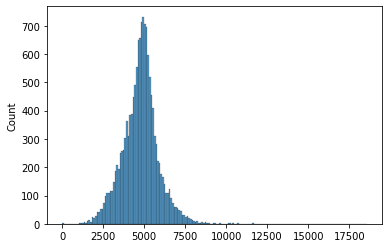

In [ ]:
sns.histplot(doc_len_list)

We can see that most after 8000 the word frequancey started to be very minimalistic so we will define this as boundery

In [ ]:

token = Tokenizer(lower=True)
token.fit_on_texts(x_train)

In [ ]:
#convert to sequences
x_train_dl = token.texts_to_sequences(x_train)
x_val_dl = token.texts_to_sequences(x_validation)
x_test_dl = token.texts_to_sequences(x_test)

In [ ]:
max_words = 8000

x_train_dl = pad_sequences(x_train_dl, maxlen=max_words)
x_val_dl = pad_sequences(x_val_dl, maxlen=max_words)
x_test_dl = pad_sequences(x_test_dl, maxlen=max_words)

In [ ]:
x_train_dl.shape

(14374, 8000)

First Model: FC- NN

In [ ]:
import tensorflow as tf

# Define the model architecture
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(max_words,)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_dl, y_train,
                    validation_data=(x_val_dl, y_validation),
                    epochs=7, batch_size=32)


Epoch 1/7
450/450 [==============================] - 8s 5ms/step - loss: 309.8097 - accuracy: 0.3785 - val_loss: 1.0688 - val_accuracy: 0.4312
Epoch 2/7
450/450 [==============================] - 2s 4ms/step - loss: 4.9971 - accuracy: 0.4118 - val_loss: 1.0551 - val_accuracy: 0.4312
Epoch 3/7
450/450 [==============================] - 2s 4ms/step - loss: 2.7939 - accuracy: 0.4130 - val_loss: 1.0523 - val_accuracy: 0.4312
Epoch 4/7
450/450 [==============================] - 2s 4ms/step - loss: 2.0572 - accuracy: 0.4124 - val_loss: 1.0520 - val_accuracy: 0.4312
Epoch 5/7
450/450 [==============================] - 2s 4ms/step - loss: 1.2632 - accuracy: 0.4135 - val_loss: 1.0520 - val_accuracy: 0.4312
Epoch 6/7
450/450 [==============================] - 2s 4ms/step - loss: 1.5672 - accuracy: 0.4133 - val_loss: 1.0519 - val_accuracy: 0.4312
Epoch 7/7
450/450 [==============================] - 2s 4ms/step - loss: 1.2452 - accuracy: 0.4135 - val_loss: 1.0516 - val_accuracy: 0.4312


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_dl, y_test)
print('Test accuracy:', test_acc)

133/133 [==============================] - 0s 3ms/step - loss: 1.0587 - accuracy: 0.4130
Test accuracy: 0.4129612147808075


We can see the accuracy is like the naive accuracy - The proporation of label 1

Second Model: FC-NN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the number of neurons in each layer
num_neurons = [512, 256, 128]

# Define the model architecture
model = Sequential()
model.add(Dense(num_neurons[0], activation='relu', input_shape=(max_words,)))
model.add(Dropout(0.2))
model.add(Dense(num_neurons[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_neurons[2], activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(x_train_dl, y_train,
                    validation_data=(x_val_dl, y_validation),
                    epochs=7, batch_size=46)


Epoch 1/7
313/313 [==============================] - 4s 6ms/step - loss: 511.2553 - accuracy: 0.3483 - val_loss: 36.3392 - val_accuracy: 0.4048
Epoch 2/7
313/313 [==============================] - 2s 5ms/step - loss: 59.7683 - accuracy: 0.3677 - val_loss: 6.8292 - val_accuracy: 0.3942
Epoch 3/7
313/313 [==============================] - 1s 5ms/step - loss: 24.8864 - accuracy: 0.3753 - val_loss: 6.5419 - val_accuracy: 0.2984
Epoch 4/7
313/313 [==============================] - 2s 5ms/step - loss: 16.0544 - accuracy: 0.3707 - val_loss: 4.2475 - val_accuracy: 0.4312
Epoch 5/7
313/313 [==============================] - 1s 5ms/step - loss: 9.9767 - accuracy: 0.3723 - val_loss: 3.1648 - val_accuracy: 0.2255
Epoch 6/7
313/313 [==============================] - 2s 5ms/step - loss: 11.2437 - accuracy: 0.3633 - val_loss: 1.5292 - val_accuracy: 0.3886
Epoch 7/7
313/313 [==============================] - 2s 5ms/step - loss: 7.1431 - accuracy: 0.3722 - val_loss: 1.1246 - val_accuracy: 0.4143


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_dl, y_test)
print('Test accuracy:', test_acc)

133/133 [==============================] - 0s 3ms/step - loss: 1.1544 - accuracy: 0.4004
Test accuracy: 0.4004257321357727


We Can see we didn't succeed to improve accuracy

Model 3: LSTM

In [ ]:
model_3 = keras.models.Sequential([
    keras.layers.Dense(7680, input_shape=(max_words,)),
    keras.layers.Reshape((60, 128)),
    keras.layers.BatchNormalization(),    
    keras.layers.LSTM(256, return_sequences=True, activation='tanh'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.LSTM(256, return_sequences=False, activation='tanh'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(3, activation='softmax')
])


In [ ]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model_3.fit(x_train_dl, y_train,
                    validation_data=(x_val_dl, y_validation),
                    epochs=7, batch_size=32)

Epoch 1/7
450/450 [==============================] - 18s 27ms/step - loss: 1.2808 - accuracy: 0.3632 - val_loss: 1.0659 - val_accuracy: 0.3717
Epoch 2/7
450/450 [==============================] - 10s 23ms/step - loss: 1.0987 - accuracy: 0.3904 - val_loss: 1.0520 - val_accuracy: 0.4265
Epoch 3/7
450/450 [==============================] - 10s 22ms/step - loss: 1.0770 - accuracy: 0.4012 - val_loss: 1.0513 - val_accuracy: 0.4296
Epoch 4/7
450/450 [==============================] - 10s 23ms/step - loss: 1.0655 - accuracy: 0.4294 - val_loss: 1.0597 - val_accuracy: 0.4277
Epoch 5/7
450/450 [==============================] - 10s 23ms/step - loss: 1.0250 - accuracy: 0.4969 - val_loss: 1.0688 - val_accuracy: 0.3886
Epoch 6/7
450/450 [==============================] - 10s 23ms/step - loss: 0.9562 - accuracy: 0.5566 - val_loss: 1.1500 - val_accuracy: 0.4107
Epoch 7/7
450/450 [==============================] - 11s 24ms/step - loss: 0.8517 - accuracy: 0.6229 - val_loss: 1.2819 - val_accuracy: 0.4170

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model_3.evaluate(x_test_dl, y_test)
print('Test accuracy:', test_acc)

133/133 [==============================] - 1s 8ms/step - loss: 3.2236 - accuracy: 0.3737
Test accuracy: 0.3736991584300995


 We got lame accuracy too




Model 4: CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense

max_words = 8000

model = Sequential()

model.add(Embedding(max_words, 100, input_length=None))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(64, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train_dl, y_train,
                    validation_data=(x_val_dl, y_validation),
                    epochs=7, batch_size=32)

Epoch 1/7
450/450 [==============================] - 65s 128ms/step - loss: 1.0661 - accuracy: 0.4057 - val_loss: 1.0525 - val_accuracy: 0.3717
Epoch 2/7
450/450 [==============================] - 42s 93ms/step - loss: 1.0539 - accuracy: 0.4146 - val_loss: 1.0395 - val_accuracy: 0.4387
Epoch 3/7
450/450 [==============================] - 34s 74ms/step - loss: 1.0284 - accuracy: 0.4471 - val_loss: 1.0360 - val_accuracy: 0.4572
Epoch 4/7
450/450 [==============================] - 29s 65ms/step - loss: 0.9496 - accuracy: 0.5470 - val_loss: 1.1527 - val_accuracy: 0.3528
Epoch 5/7
450/450 [==============================] - 26s 59ms/step - loss: 0.7507 - accuracy: 0.6879 - val_loss: 1.3910 - val_accuracy: 0.2944
Epoch 6/7
450/450 [==============================] - 23s 52ms/step - loss: 0.4808 - accuracy: 0.8211 - val_loss: 1.3875 - val_accuracy: 0.3914
Epoch 7/7
450/450 [==============================] - 23s 50ms/step - loss: 0.2563 - accuracy: 0.9158 - val_loss: 2.3806 - val_accuracy: 0.436

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_dl, y_test)
print('Test accuracy:', test_acc)

133/133 [==============================] - 2s 12ms/step - loss: 2.4342 - accuracy: 0.4257
Test accuracy: 0.42573320865631104




This is the highest accuracy until now


Model 5: RNN and CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, LSTM

max_words = 8000

model = Sequential()

model.add(Embedding(max_words, 100, input_length=None))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train_dl, y_train,
                    validation_data=(x_val_dl, y_validation),
                    epochs=5, batch_size=32)

Epoch 1/5
450/450 [==============================] - 786s 2s/step - loss: 1.0656 - accuracy: 0.4077 - val_loss: 1.0529 - val_accuracy: 0.4312
Epoch 2/5
450/450 [==============================] - 766s 2s/step - loss: 1.0637 - accuracy: 0.4116 - val_loss: 1.0585 - val_accuracy: 0.4312
Epoch 3/5
450/450 [==============================] - 744s 2s/step - loss: 1.0498 - accuracy: 0.4267 - val_loss: 1.0637 - val_accuracy: 0.4285
Epoch 4/5
450/450 [==============================] - 740s 2s/step - loss: 0.9412 - accuracy: 0.5291 - val_loss: 1.1143 - val_accuracy: 0.3382
Epoch 5/5
450/450 [==============================] - 738s 2s/step - loss: 0.5768 - accuracy: 0.7552 - val_loss: 1.4501 - val_accuracy: 0.3551


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_dl, y_test)
print('Test accuracy:', test_acc)

133/133 [==============================] - 19s 145ms/step - loss: 1.4637 - accuracy: 0.3668
Test accuracy: 0.366840124130249
